In [1]:
import os
import pickle
import torch
import seaborn as sns
import numpy as np
import numpy.linalg as LA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [2]:
from utils import cal_spectral_feature, to_np
from dataset import implicit_CF_dataset, load_data
os.environ["CUDA_VISIBLE_DEVICES"] = str(2)

In [3]:
lightgcn_items = np.load('crafts/gowalla_lightgcn_post_items.npy')
lightgcn_users = np.load('crafts/gowalla_lightgcn_post_users.npy')
# lightgcn_1024_items = np.load('crafts/gowalla_lightgcn_dim1024_post_items.npy')
# lightgcn_1024_users = np.load('crafts/gowalla_lightgcn_dim1024_post_users.npy')
bpr_items = np.load('crafts/gowalla_bpr_items.npy')
bpr_users = np.load('crafts/gowalla_bpr_users.npy')
jgcf_items = np.load('crafts/gowalla_jgcf_post_items.npy')
jgcf_users = np.load('crafts/gowalla_jgcf_post_users.npy')

In [4]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('gowalla')
trainset = implicit_CF_dataset(num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
adj_mat = trainset.SparseGraph

eigenvalues_large, eigenvectors_large = cal_spectral_feature(adj_mat, 500, largest=True, niter=10)
eigenvalues_large, eigenvectors_large = to_np(eigenvalues_large), to_np(eigenvectors_large)

eigenvalues_small, eigenvectors_small = cal_spectral_feature(adj_mat, 500, largest=False, niter=10)
eigenvalues_small, eigenvectors_small = to_np(eigenvalues_small), to_np(eigenvectors_small)

eigenvalues = np.concatenate([eigenvalues_large, eigenvalues_small], axis=0)
eigenvectors = np.concatenate([eigenvectors_large, eigenvectors_small], axis=1)

In [5]:
lightgcn_embs = np.concatenate([lightgcn_users, lightgcn_items])
jgcf_embs = np.concatenate([jgcf_users, jgcf_items])
bpr_embs = np.concatenate([bpr_users, bpr_items])

lightgcn_embs = lightgcn_embs / LA.norm(lightgcn_embs, axis=0, keepdims=True)
jgcf_embs = jgcf_embs / LA.norm(jgcf_embs, axis=0, keepdims=True)
bpr_embs = bpr_embs / LA.norm(bpr_embs, axis=0, keepdims=True)

conv_lightgcn_embs = np.power(np.matmul(eigenvectors.T, lightgcn_embs), 2)
conv_jgcf_embs = np.power(np.matmul(eigenvectors.T, jgcf_embs), 2)
conv_bpr_embs = np.power(np.matmul(eigenvectors.T, bpr_embs), 2)   # 1000, 64

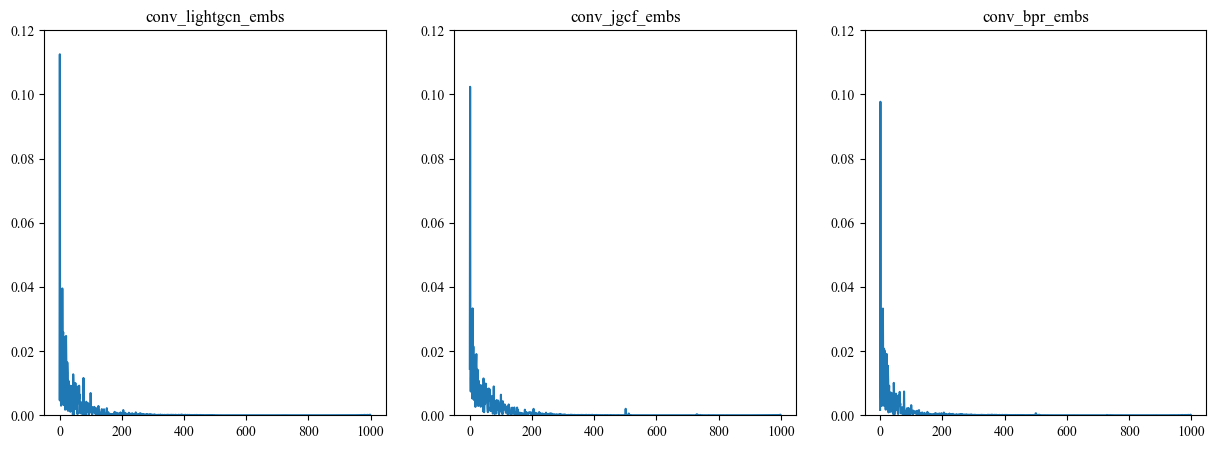

In [6]:
dim = 9
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('conv_lightgcn_embs')
axes[0].plot(conv_lightgcn_embs.mean(-1))
axes[1].set_title('conv_jgcf_embs')
axes[1].plot(conv_jgcf_embs.mean(-1))
axes[2].set_title('conv_bpr_embs')
axes[2].plot(conv_bpr_embs.mean(-1))
for ax in axes:
    # ax.set_xlim(-0.4, -0.2)
    ax.set_ylim(0, 0.12)

In [7]:
np.sum(conv_lightgcn_embs.mean(-1)[:200]), np.sum(conv_jgcf_embs.mean(-1)[:200]), np.sum(conv_bpr_embs.mean(-1)[:200])

(0.83093727, 0.8865389, 0.6431064)

In [8]:
np.sum(conv_lightgcn_embs.mean(-1)[-200:]), np.sum(conv_jgcf_embs.mean(-1)[-200:]), np.sum(conv_bpr_embs.mean(-1)[-200:])

(0.0060868617, 0.0067996657, 0.0057103294)

In [9]:
np.sum(conv_lightgcn_embs.mean(-1)[200:-200]), np.sum(conv_jgcf_embs.mean(-1)[200:-200]), np.sum(conv_bpr_embs.mean(-1)[200:-200])

(0.05340621, 0.057360716, 0.04407296)

In [6]:
adj_mat = pickle.load(open("data/office/amazon_office_graph.pkl", "rb"))
eigenvalues_large, eigenvectors_large = cal_spectral_feature(adj_mat, 500, largest=True, niter=10)
eigenvalues_large, eigenvectors_large = to_np(eigenvalues_large), to_np(eigenvectors_large)

eigenvalues_small, eigenvectors_small = cal_spectral_feature(adj_mat, 500, largest=False, niter=10)
eigenvalues_small, eigenvectors_small = to_np(eigenvalues_small), to_np(eigenvectors_small)

eigenvalues = np.concatenate([eigenvalues_large, eigenvalues_small], axis=0)
eigenvectors = np.concatenate([eigenvectors_large, eigenvectors_small], axis=1)

In [27]:
newngcf_users = pickle.load(open("data/office/newNGCF_user.pkl", "rb")).detach().cpu().numpy()
newngcf_items = pickle.load(open("data/office/newNGCF_item.pkl", "rb")).detach().cpu().numpy()
ngcf_users = pickle.load(open("data/office/NGCF_user.pkl", "rb")).detach().cpu().numpy()
ngcf_items = pickle.load(open("data/office/NGCF_item.pkl", "rb")).detach().cpu().numpy()
lightgcn_users = pickle.load(open("data/office/LightGCN_user_layer7.pkl", "rb")).detach().cpu().numpy()
lightgcn_items = pickle.load(open("data/office/LightGCN_item_layer7.pkl", "rb")).detach().cpu().numpy()
newgcn_users = pickle.load(open("data/office/newGCN_user.pkl", "rb")).detach().cpu().numpy()
newgcn_items = pickle.load(open("data/office/newGCN_item.pkl", "rb")).detach().cpu().numpy()
lightgcn_3_users = pickle.load(open("data/office/LightGCN_user_layer3.pkl", "rb")).detach().cpu().numpy()
lightgcn_3_items = pickle.load(open("data/office/LightGCN_item_layer3.pkl", "rb")).detach().cpu().numpy()

In [28]:
newngcf_embs = np.concatenate([newngcf_users, newngcf_items])
newgcn_embs = np.concatenate([newgcn_users, newgcn_items])
ngcf_embs = np.concatenate([ngcf_users, ngcf_items])
lightgcn_embs = np.concatenate([lightgcn_users, lightgcn_items])
lightgcn_3_embs = np.concatenate([lightgcn_3_users, lightgcn_3_items])

newngcf_embs = newngcf_embs / LA.norm(newngcf_embs, axis=0, keepdims=True)
ngcf_embs = ngcf_embs / LA.norm(ngcf_embs, axis=0, keepdims=True)
lightgcn_embs = lightgcn_embs / LA.norm(lightgcn_embs, axis=0, keepdims=True)
newgcn_embs = newgcn_embs / LA.norm(newgcn_embs, axis=0, keepdims=True)
lightgcn_3_embs = lightgcn_3_embs / LA.norm(lightgcn_3_embs, axis=0, keepdims=True)

conv_newngcf_embs = np.power(np.matmul(eigenvectors.T, newngcf_embs), 2)   # 1000, 64
conv_ngcf_embs = np.power(np.matmul(eigenvectors.T, ngcf_embs), 2)
conv_lightgcn_embs = np.power(np.matmul(eigenvectors.T, lightgcn_embs), 2)
conv_newgcn_embs = np.power(np.matmul(eigenvectors.T, newgcn_embs), 2)
conv_lightgcn_3_embs = np.power(np.matmul(eigenvectors.T, lightgcn_3_embs), 2)

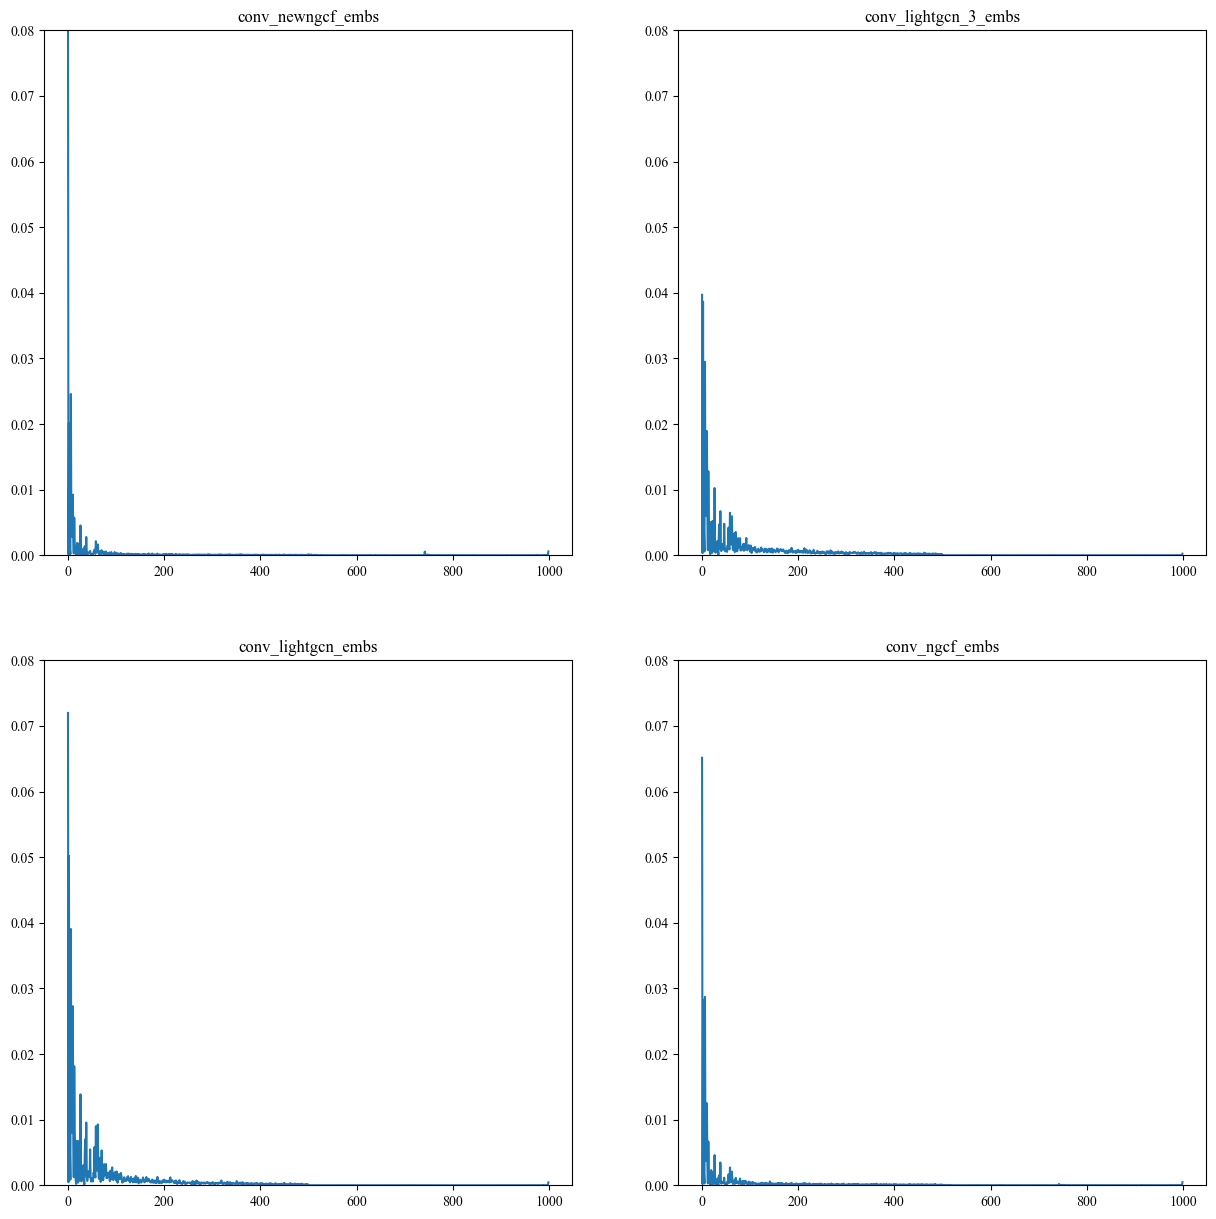

In [29]:
dim = 9
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0, 0].set_title('conv_newngcf_embs')
axes[0, 0].plot(conv_newngcf_embs.mean(-1))
axes[0, 1].set_title('conv_lightgcn_3_embs')
axes[0, 1].plot(conv_lightgcn_3_embs.mean(-1))
axes[1, 0].set_title('conv_lightgcn_embs')
axes[1, 0].plot(conv_lightgcn_embs.mean(-1))
axes[1, 1].set_title('conv_ngcf_embs')
axes[1, 1].plot(conv_ngcf_embs.mean(-1))
for axs in axes:
    for ax in axs:
        # ax.set_xlim(-0.4, -0.2)
        ax.set_ylim(0, 0.08)

In [30]:
np.sum(conv_newngcf_embs.mean(-1)[:200]), np.sum(conv_lightgcn_3_embs.mean(-1)[:200]), np.sum(conv_lightgcn_embs.mean(-1)[:200]), np.sum(conv_ngcf_embs.mean(-1)[:200])

(0.21724194, 0.4063178, 0.5505401, 0.24450386)

In [31]:
np.sum(conv_newngcf_embs.mean(-1)[-200:]), np.sum(conv_lightgcn_3_embs.mean(-1)[-200:]), np.sum(conv_lightgcn_embs.mean(-1)[-200:]), np.sum(conv_ngcf_embs.mean(-1)[-200:])

(0.0032625804, 0.0012980779, 0.0017980225, 0.0031143266)

In [32]:
np.sum(conv_newngcf_embs.mean(-1)[200:-200]), np.sum(conv_lightgcn_3_embs.mean(-1)[200:-200]), np.sum(conv_lightgcn_embs.mean(-1)[200:-200]), np.sum(conv_ngcf_embs.mean(-1)[200:-200])

(0.026879236, 0.09931387, 0.090674765, 0.042238645)

In [16]:
adj_mat = pickle.load(open("data/gowalla/aug_graph.pkl", "rb"))

eigenvalues_large, eigenvectors_large = cal_spectral_feature(adj_mat, 500, largest=True, niter=10)
eigenvalues_large, eigenvectors_large = to_np(eigenvalues_large), to_np(eigenvectors_large)

eigenvalues_small, eigenvectors_small = cal_spectral_feature(adj_mat, 500, largest=False, niter=10)
eigenvalues_small, eigenvectors_small = to_np(eigenvalues_small), to_np(eigenvectors_small)

eigenvalues = np.concatenate([eigenvalues_large, eigenvalues_small], axis=0)
eigenvectors = np.concatenate([eigenvectors_large, eigenvectors_small], axis=1)

In [17]:
lightgcn_embs = np.concatenate([lightgcn_users, lightgcn_items])
jgcf_embs = np.concatenate([jgcf_users, jgcf_items])
bpr_embs = np.concatenate([bpr_users, bpr_items])

lightgcn_embs = lightgcn_embs / LA.norm(lightgcn_embs, axis=0, keepdims=True)
jgcf_embs = jgcf_embs / LA.norm(jgcf_embs, axis=0, keepdims=True)
bpr_embs = bpr_embs / LA.norm(bpr_embs, axis=0, keepdims=True)

conv_lightgcn_embs = np.power(np.matmul(eigenvectors.T, lightgcn_embs), 2)
conv_jgcf_embs = np.power(np.matmul(eigenvectors.T, jgcf_embs), 2)
conv_bpr_embs = np.power(np.matmul(eigenvectors.T, bpr_embs), 2)   # 1000, 64

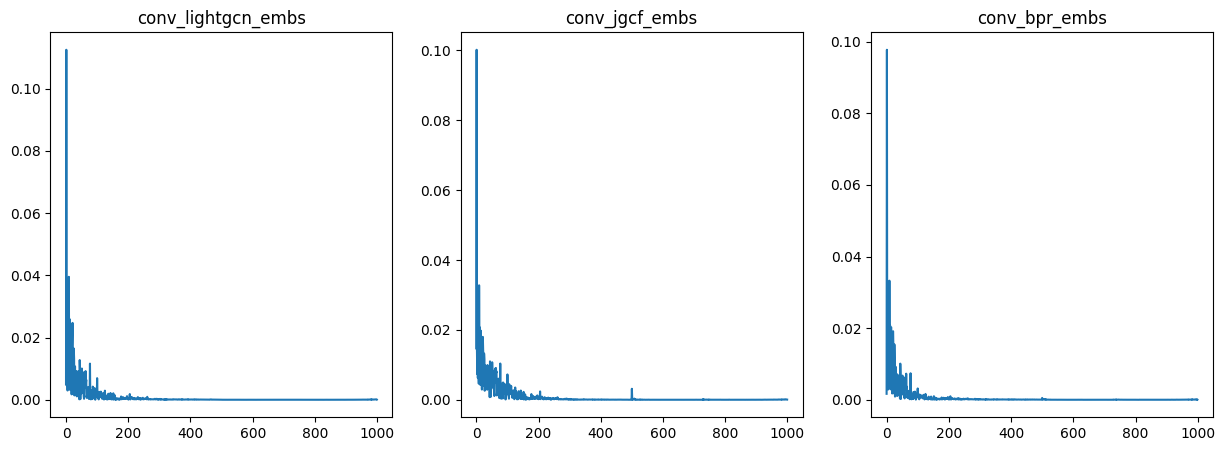

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('conv_lightgcn_embs')
axes[0].plot(conv_lightgcn_embs.mean(-1))
axes[1].set_title('conv_jgcf_embs')
axes[1].plot(conv_jgcf_embs.mean(-1))
axes[2].set_title('conv_bpr_embs')
axes[2].plot(conv_bpr_embs.mean(-1))
# for ax in axes:
#     # ax.set_xlim(-0.4, -0.2)
#     ax.set_ylim(0, 0.0005)

In [36]:
conv_lightgcn_embs[:500].sum(0).mean(), conv_jgcf_embs[:500].sum(0).mean(), conv_bpr_embs[:500].sum(0).mean()

(0.8805521, 0.9293251, 0.67957264)

In [37]:
conv_lightgcn_embs[-500:].sum(0).mean(), conv_jgcf_embs[-500:].sum(0).mean(), conv_bpr_embs[-500:].sum(0).mean()

(0.010309847, 0.017859194, 0.013440106)

In [39]:
conv_lightgcn_embs.sum(0).mean(), conv_jgcf_embs.sum(0).mean(), conv_bpr_embs.sum(0).mean()

(0.8908619, 0.94718426, 0.6930127)

In [31]:
conv_lightgcn_embs.shape

(1000, 64)

Text(0.5, 1.0, 'GFCF_HL on gowalla')

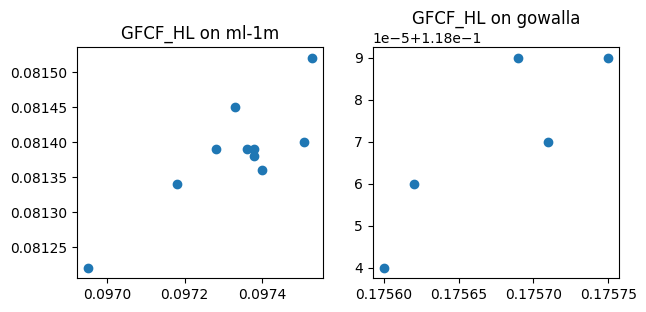

In [7]:
hr_ndcg = np.array([[0.09718, 0.08134], [0.09753, 0.08152], [0.09736, 0.08139], [0.09728, 0.08139], [0.09740, 0.08136], [0.09695, 0.08122], [0.09733, 0.08145], [0.09751, 0.08140], [0.09738, 0.08138], [0.09738, 0.08139]])
fig, axes = plt.subplots(1, 2, figsize=(7, 3))
axes[0].scatter(hr_ndcg[:, 0], hr_ndcg[:, 1])
axes[0].set_title("GFCF_HL on ml-1m")
hr_ndcg = np.array([[0.17575, 0.11809], [0.17571, 0.11807], [0.17562, 0.11806], [0.17569, 0.11809], [0.17560, 0.11804]])
axes[1].scatter(hr_ndcg[:, 0], hr_ndcg[:, 1])
axes[1].set_title("GFCF_HL on gowalla")

In [ ]:
hr_ndcg = np.array([[0.09718, 0.08134], [0.09753, 0.08152], [0.09736, 0.08139], [0.09728, 0.08139], [0.09740, 0.08136], [0.09695, 0.08122], [0.09733, 0.08145], [0.09751, 0.08140], [0.09738, 0.08138], [0.09738, 0.08139]])
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(hr_ndcg[:, 0], hr_ndcg[:, 1])

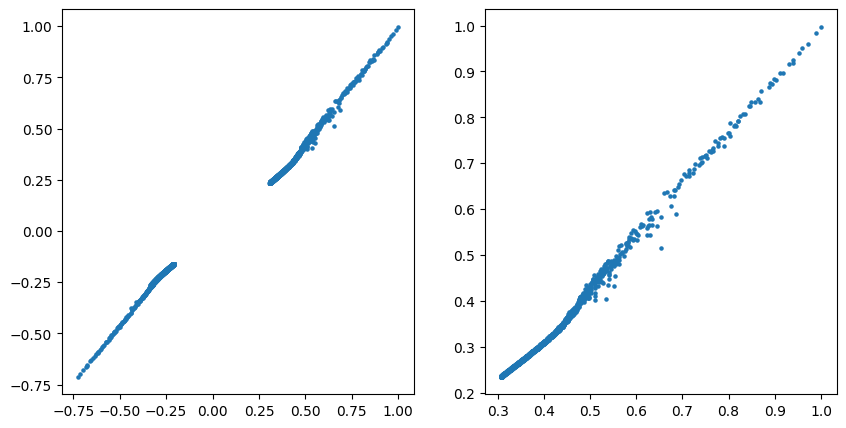

In [5]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('gowalla')
trainset = implicit_CF_dataset("gowalla", num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
train_adj_mat = trainset.SparseGraph

train_eigenvalues_large, train_eigenvectors_large = cal_spectral_feature(train_adj_mat, 5000, largest=True, niter=10)
train_eigenvalues_large, train_eigenvectors_large = to_np(train_eigenvalues_large), to_np(train_eigenvectors_large)

train_eigenvalues_small, train_eigenvectors_small = cal_spectral_feature(train_adj_mat, 5000, largest=False, niter=10)
train_eigenvalues_small, train_eigenvectors_small = to_np(train_eigenvalues_small), to_np(train_eigenvectors_small)

train_eigenvalues = np.concatenate([train_eigenvalues_large, train_eigenvalues_small], axis=0)
train_eigenvectors = np.concatenate([train_eigenvectors_large, train_eigenvectors_small], axis=1)

all_pairs = torch.cat([train_pairs, valid_pairs, test_pairs], dim=0)
allset = implicit_CF_dataset("gowalla", num_users, num_items, all_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
all_adj_mat = allset.SparseGraph

U = torch.from_numpy(train_eigenvectors).cuda()
UT_B_U = torch.sparse.mm(U.T, all_adj_mat).mm(U)

diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(diag_A, diag_B, s=5)
axes[1].scatter(diag_A[:5000], diag_B[:5000], s=5)

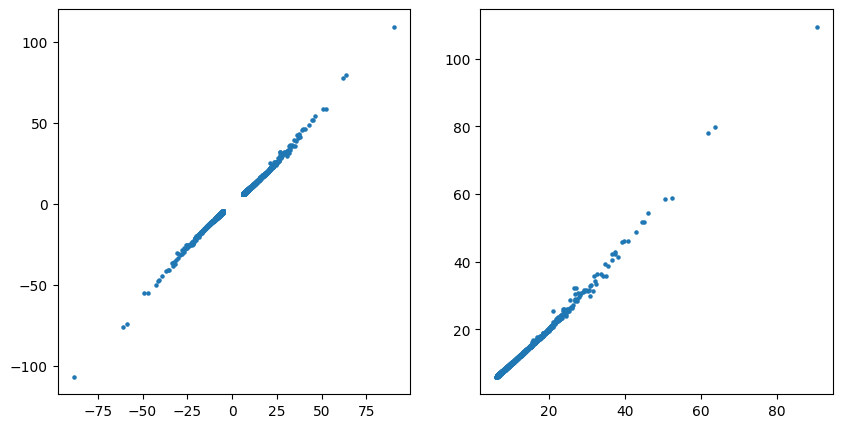

In [3]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('gowalla')
trainset = implicit_CF_dataset("gowalla", num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
train_adj_mat = trainset.oriSparseGraph.float()

train_eigenvalues_large, train_eigenvectors_large = cal_spectral_feature(train_adj_mat, 5000, largest=True, niter=10)
train_eigenvalues_large, train_eigenvectors_large = to_np(train_eigenvalues_large), to_np(train_eigenvectors_large)

train_eigenvalues_small, train_eigenvectors_small = cal_spectral_feature(train_adj_mat, 5000, largest=False, niter=10)
train_eigenvalues_small, train_eigenvectors_small = to_np(train_eigenvalues_small), to_np(train_eigenvectors_small)

train_eigenvalues = np.concatenate([train_eigenvalues_large, train_eigenvalues_small], axis=0)
train_eigenvectors = np.concatenate([train_eigenvectors_large, train_eigenvectors_small], axis=1)

all_pairs = torch.cat([train_pairs, valid_pairs, test_pairs], dim=0)
allset = implicit_CF_dataset("gowalla", num_users, num_items, all_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
all_adj_mat = allset.oriSparseGraph.float()

U = torch.from_numpy(train_eigenvectors).cuda()
UT_B_U = torch.sparse.mm(U.T, all_adj_mat).mm(U)

diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(diag_A, diag_B, s=5)
axes[1].scatter(diag_A[:5000], diag_B[:5000], s=5)

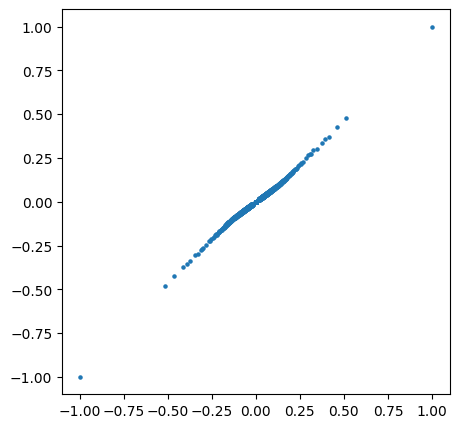

In [9]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('ml-1m')
trainset = implicit_CF_dataset("ml-1m", num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
train_adj_mat = trainset.SparseGraph.float()

train_eigenvalues, train_eigenvectors = torch.linalg.eigh(train_adj_mat.to_dense())
train_eigenvalues, train_eigenvectors = to_np(train_eigenvalues), to_np(train_eigenvectors)

all_pairs = torch.cat([train_pairs, valid_pairs, test_pairs], dim=0)
allset = implicit_CF_dataset("ml-1m", num_users, num_items, all_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
all_adj_mat = allset.SparseGraph.float()

U = torch.from_numpy(train_eigenvectors).cuda()
UT_B_U = torch.sparse.mm(U.T, all_adj_mat).mm(U)

diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(diag_A, diag_B, s=5)

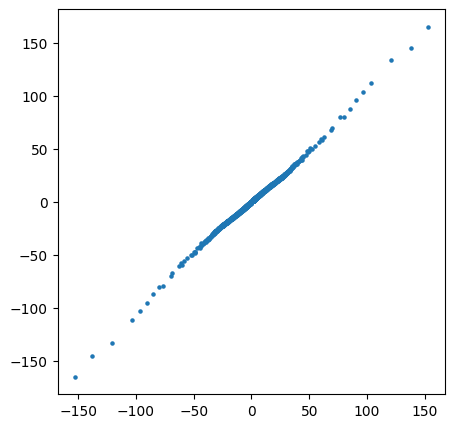

In [11]:
diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(diag_A[1:-1], diag_B[1:-1], s=5)

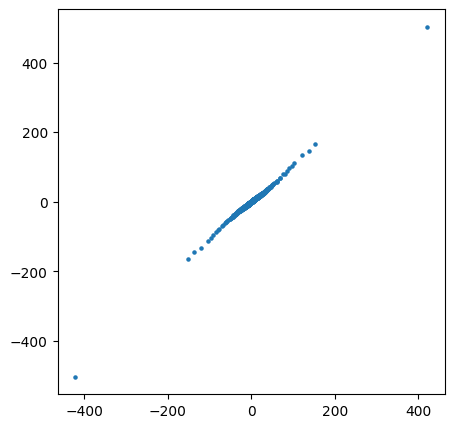

In [10]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('ml-1m')
trainset = implicit_CF_dataset("ml-1m", num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
train_adj_mat = trainset.oriSparseGraph.float()

train_eigenvalues, train_eigenvectors = torch.linalg.eigh(train_adj_mat.to_dense())
train_eigenvalues, train_eigenvectors = to_np(train_eigenvalues), to_np(train_eigenvectors)

all_pairs = torch.cat([train_pairs, valid_pairs, test_pairs], dim=0)
allset = implicit_CF_dataset("ml-1m", num_users, num_items, all_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
all_adj_mat = allset.oriSparseGraph.float()

U = torch.from_numpy(train_eigenvectors).cuda()
UT_B_U = torch.sparse.mm(U.T, all_adj_mat).mm(U)

diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(diag_A, diag_B, s=5)

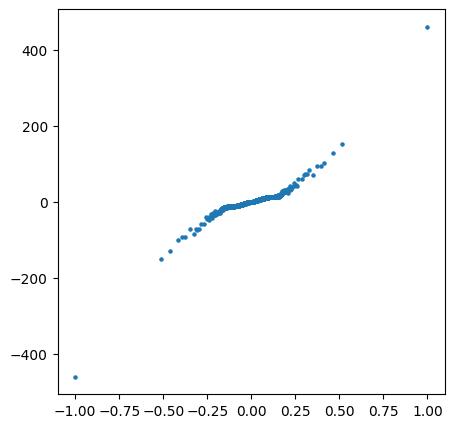

In [6]:
num_users, num_items, train_pairs, valid_pairs, test_pairs, train_dict, valid_dict, test_dict, train_matrix, user_pop, item_pop = load_data('ml-1m')
trainset = implicit_CF_dataset("ml-1m", num_users, num_items, train_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
train_adj_mat = trainset.SparseGraph.float()

train_eigenvalues, train_eigenvectors = torch.linalg.eigh(train_adj_mat.to_dense())
train_eigenvalues, train_eigenvectors = to_np(train_eigenvalues), to_np(train_eigenvectors)

all_pairs = torch.cat([train_pairs, valid_pairs, test_pairs], dim=0)
allset = implicit_CF_dataset("ml-1m", num_users, num_items, all_pairs, train_matrix, train_dict, user_pop, item_pop, 1)
all_adj_mat = allset.oriSparseGraph.float()

U = torch.from_numpy(train_eigenvectors).cuda()
UT_B_U = torch.sparse.mm(U.T, all_adj_mat).mm(U)

diag_A = train_eigenvalues
diag_B = torch.diag(UT_B_U).cpu().numpy()
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(diag_A, diag_B, s=5)